# Introduction

The purpose of this project is to perform an exploratory data analysis (EDA) to understand the customer behavior and improve the customer retention of a telecommunications company. The data was shared by IBM Watson Analytics [(see the source page here)](https://www.ibm.com/communities/analytics/watson-analytics-blog/predictive-insights-in-the-telco-customer-churn-data-set/), and also available from [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn). 

### Proposed Aim

The source page contains a short description of the aim of the project as follows:

>A telecommunications company is concerned about the number of customers leaving their landline business for cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and you have to find out who is leaving and why.



### Additional Aim

In addition to the proposed aim, stakeholders might be interested to know where the major revenue comes from, and what incentives they can offer to potential customers in order to increase customer retention and the revenue.

### Analysis Framework

The following questions will serve as a framework to analyze the data set and to provide business insights.

1. Churn-based Analysis
    1. Who is likely to churn?
    2. What behavior and characteristics can we learn from the churned customers?
    3. What features differentiates the churned customers from the current customers?


2. Revenue-based Analysis
    1. Who is the most valuable customers?
    2. Which features do they likely to have?
   
   
3. Recommendations: What can we do to
    1. Reduce the churn-prone customers?
    2. Maintain and maximize the most valuable customers?


### Data Description

The source data provides a brief description of the data:

>The data set includes information about:
>- Customers who left within the last month – the column is called Churn
>- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
>- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
>- Demographic info about customers – gender, age range, and if they have partners and dependents



### Understanding the Data

Let's first take a look at the data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Getting the number of rows and columns
print("Number of rows: {0}, number of columns: {1}".format(df.shape[0], df.shape[1]))

Number of rows: 7043, number of columns: 21


### Data Cleansing
Let's make sure we don't have missing values.

In [5]:
# Getting the number of missing values in each columns
np.sum(df.isnull())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No NaN values. It looks like this is a clean data set, but something doesn't look right. Let's take a look at the data types.

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Strangely, the "TotalCharges" column is of an "object" data type, not a float64. A visual inspection shows that some cells in "TotalCharges" contain a space character (" "). Let's see what these rows are.

In [7]:
df.loc[df["TotalCharges"] == " "] 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


It turns out that all of the "tenure" column (the number of months customer received the service) are zero for rows where the "TotalCharges" is a space character. I assume that the total charges is assigned a space character when "tenure" is zero because the total charge is calculated as:

    TotalCharges = MonthlyCharges * tenure 

I don't want to eliminate these entries, as they are a subgroup of the target. Instead, I will substitute the missing values with zero, as the total charges for these customers should be very small. This is because these customers terminated the service in less than a month, and therefore, their total charge is a fraction of their monthly charge. 

In [16]:
df["TotalCharges"].replace(' ', 0.0, inplace=True) # Replacing a space character (" ") with 0.0 in the "TotalCharges" column 

In [18]:
TotalCharges = pd.to_numeric(df["TotalCharges"]) # Convert the "TotalCharges" to float64...

In [19]:
df["TotalCharges"] = TotalCharges # ... and substitute.

In [24]:
df["SeniorCitizen"].replace({0:"No", 1:"Yes"}, inplace=True) # Replacing 0/1 with No/Yes

In [25]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now the "TotalCharges" is float64. Next, let's check the distribution of the churned customers vs the current customers.

In [21]:
# Getting the counts for the number of churned customers vs the current customers
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

The current customers outnumber the churned customers by a significant margin; this is an imbalanced data. We should remember that this imbalance makes the relative comparison between the two groups misleading (in terms of their absolute counts) (i.e. 10% of the churned group is smaller than 5% of the current customers (187 customers vs 259 customers, respectively.)

Study how important the customer churn is first. The organize according to the finding. 

Should I focus on the churn analysis? Should I focus on the most valuable customers?

who is most likely to chrun?

which group is the most valuable customers

then

### Question 1. Who is most likely to churn?

To answer this question, we will compare the data distribution between two groups: the churned customers and the current customers. To make the comparison easy to understand, we will group the comparison by the same data class (demographic, account information, and services).

In [13]:
# Separating the churned and the current customers into a separate dataframes. Do I need to do this??????
df_churned = df.loc[df["Churn"] == "Yes"].copy()
df_current = df.loc[df["Churn"] == "No"].copy()

#### Demographic Data Comparison

Let's first compare the demographic data between the churned and the current customers.

In [14]:
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'figure.figsize': [12, 8]})

In [15]:
demographic_column_names = ["gender", "SeniorCitizen", "Partner", "Dependents"]

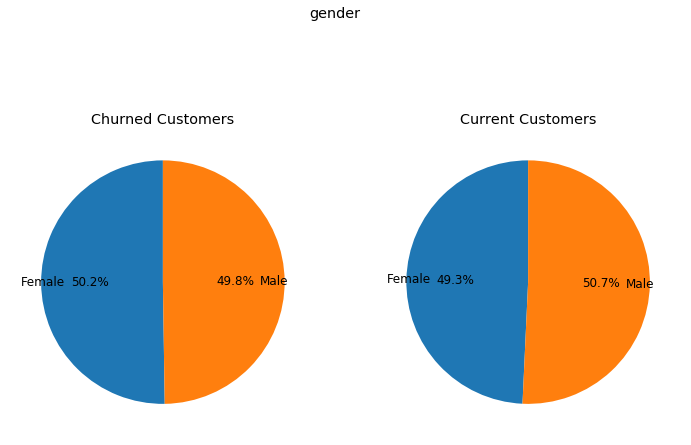

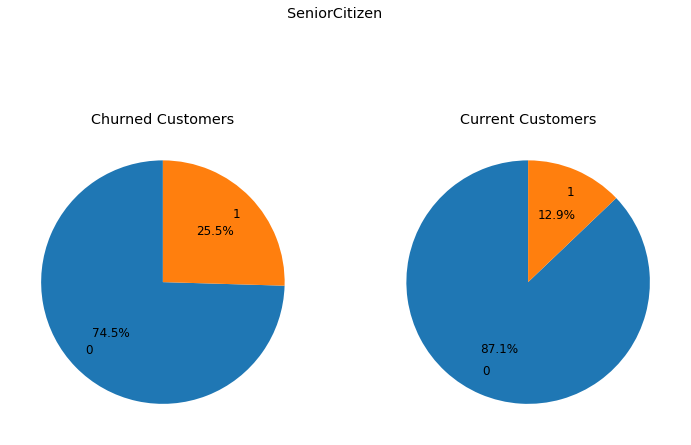

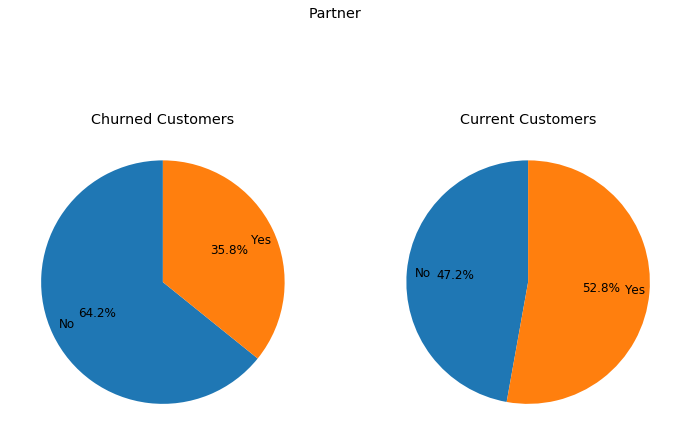

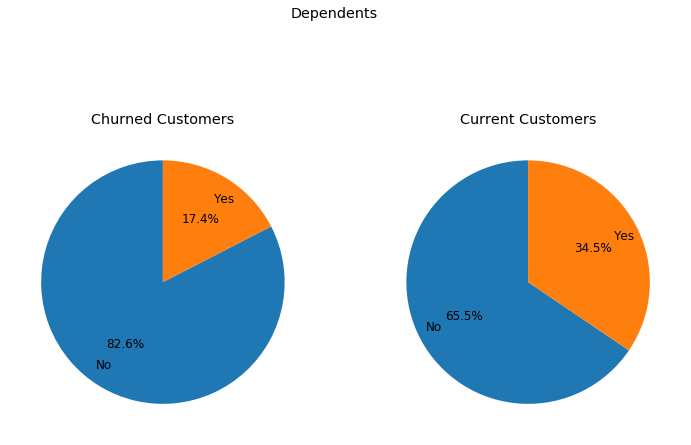

In [16]:
for col_name in demographic_column_names:
    churned_count = df_churned[col_name].value_counts()
    stayed_count = df_current[col_name].value_counts()
    
    churned_values = []
    for i in range(len(churned_count.index)):
        churned_values.append(churned_count[i])
    churned_labels = list(churned_count.index)
    
    stayed_values = []
    for i in range(len(stayed_count.index)):
        stayed_values.append(stayed_count[i])
    stayed_labels = list(stayed_count.index)
    
    churned_values_ordered = []
    stayed_values_ordered = []
    ordered_labels = []

    for name in churned_labels:
        churned_idx = churned_labels.index(name)
        stayed_idx = stayed_labels.index(name)
        churned_values_ordered.append(churned_values[churned_idx])
        stayed_values_ordered.append(stayed_values[stayed_idx])
        ordered_labels.append(name)
    
    fig = plt.figure()

    ax1 = fig.add_subplot(121) 
    ax1.pie(churned_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
         startangle=90, labeldistance=0.8)
    ax1.set_title("Churned Customers")

    ax2 = fig.add_subplot(122) 
    ax2.pie(stayed_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
        shadow=False, startangle=90, labeldistance=0.8)
    ax2.set_title("Current Customers")
    
    plt.suptitle(col_name)
    plt.show()
    
    print('\n')


Customers with partner or dependents are more likely to stay with the company. This makes sense, because, having one business simplifies billing and tech support for a family, rather than having to pay multiple bills, or deal with different companies for each members' phone problems in a family.

There doesn't seem to be a significant difference by gender or the senior status. 

#### Account Information Comparison

Let's now take a look at the account information. 

In [17]:
account_info_column_names = ["Contract", "PaperlessBilling", "PaymentMethod"]

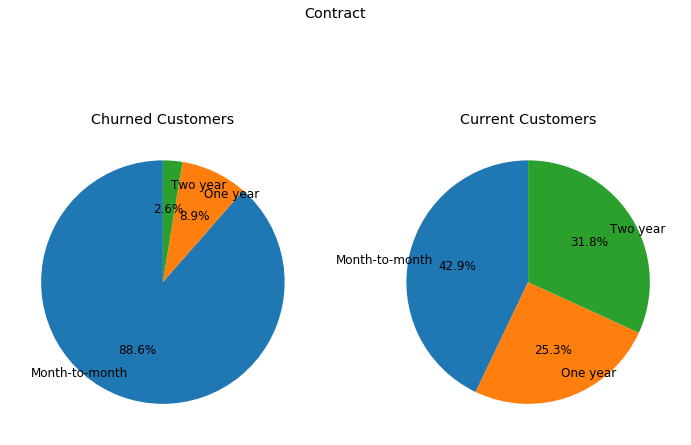

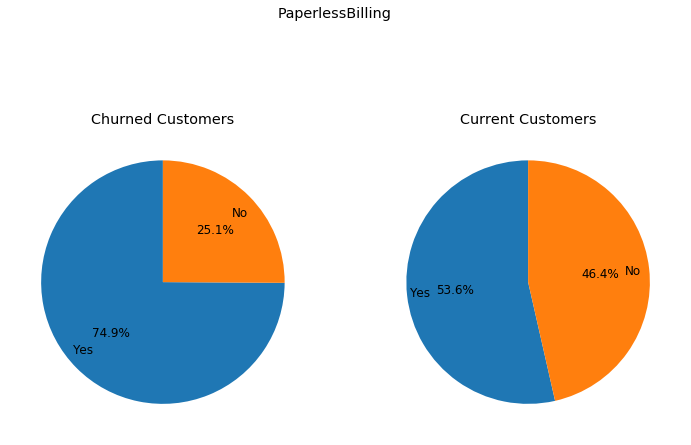

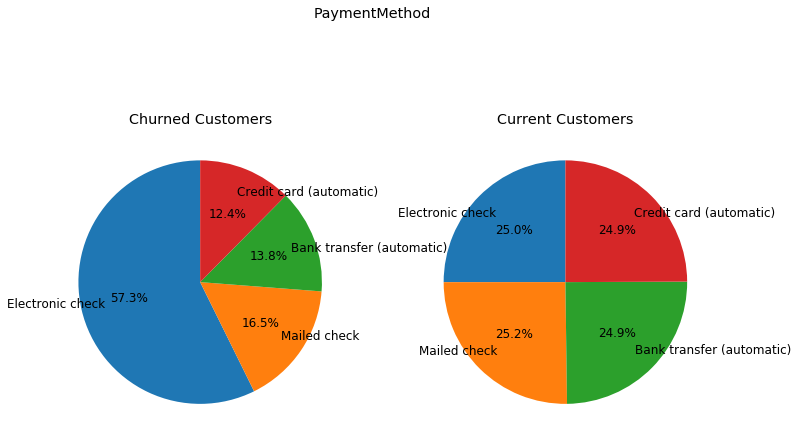

In [18]:
for col_name in account_info_column_names:
    churned_count = df_churned[col_name].value_counts()
    stayed_count = df_current[col_name].value_counts()
    
    churned_values = []
    for i in range(len(churned_count.index)):
        churned_values.append(churned_count[i])
    churned_labels = list(churned_count.index)
    
    stayed_values = []
    for i in range(len(stayed_count.index)):
        stayed_values.append(stayed_count[i])
    stayed_labels = list(stayed_count.index)
    
    churned_values_ordered = []
    stayed_values_ordered = []
    ordered_labels = []

    for name in churned_labels:
        churned_idx = churned_labels.index(name)
        stayed_idx = stayed_labels.index(name)
        churned_values_ordered.append(churned_values[churned_idx])
        stayed_values_ordered.append(stayed_values[stayed_idx])
        ordered_labels.append(name)
    
    fig = plt.figure()

    ax1 = fig.add_subplot(121) 
    ax1.pie(churned_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
         startangle=90, labeldistance=0.8)
    ax1.set_title("Churned Customers")

    ax2 = fig.add_subplot(122) 
    ax2.pie(stayed_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
        shadow=False, startangle=90, labeldistance=0.8)
    ax2.set_title("Current Customers")
    
    plt.suptitle(col_name)
    plt.show()
    
    print('\n')


The type of contract shows a significant difference between the churned and the current customers. This finding makes sense as the contract-based customers are bound to the service for a specified length of time, while the month-to-month customers have a freedom to leave. 

The paperless billing and the payment method also influences the churn-rate, but it's unclear why without further analysis.

#### Services Comparison

The services comparison requires a more detailed attention. It's reasonable to assume that customers having a phone and the Internet services have a very different behavior compared to customers with phone service alone. Remember the time you didn't have while you switch a phone carrier (or when you were moving)? Yup, I do, and it was very inconvenient for me. This creates a very strong incentive to stay with the company. Let's first look at the ratio of customers who subscribe to the phone, the Internet service, and both.

First assess the ratio of phone, internet, and both

In [19]:

service_labels = ["Phone Only", "Internet Only", "Phone and Internet"]
service_counts = []
service_counts.append(df[(df["InternetService"] == "No") & (df["PhoneService"] == "Yes")].shape[0]) # Phone only customers
service_counts.append(df[(df["InternetService"] != "No") & (df["PhoneService"] == "No")].shape[0]) # Internet only customers
service_counts.append(df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes")].shape[0]) # Phone and Internet customers

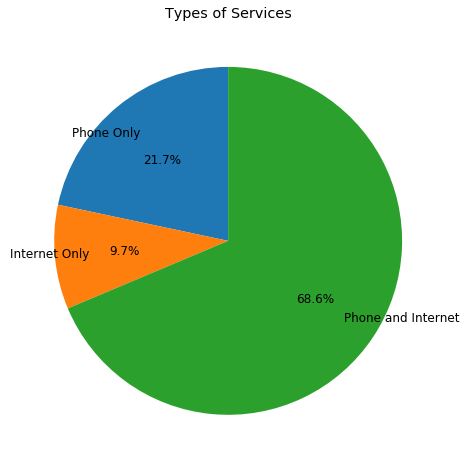

In [20]:
plt.rcParams.update({'figure.figsize': [12, 8]})
fig = plt.figure()

ax = fig.add_subplot(111)
ax.pie(service_counts, labels=service_labels, startangle=90, autopct='%1.1f%%', labeldistance=0.8)
ax.set_title("Types of Services")
plt.show()

The majority of the customers have the phone and the Internet services.

In [21]:
# Phone service only customers
service_churn_percent = []
service_churn_labels = []
values = df[(df["InternetService"] == "No") & (df["PhoneService"] == "Yes")]["Churn"].value_counts()
service_churn_percent.append(values[1] / (values[0] + values[1]) * 100.0)
service_churn_labels.append("Phone Only") 

# Internet service only customers
values = df[(df["InternetService"] != "No") & (df["PhoneService"] == "No")]["Churn"].value_counts()
service_churn_percent.append(values[1] / (values[0] + values[1]) * 100.0)
service_churn_labels.append("Internet Only")

# Phone and Internet customers
values = df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes")]["Churn"].value_counts()
service_churn_percent.append(values[1] / (values[0] + values[1]) * 100.0)
service_churn_labels.append("Phone and Internet")


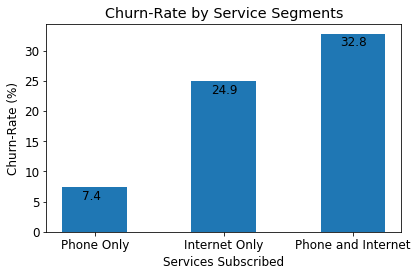

In [22]:
plt.rcParams.update({'figure.figsize': [6, 4]})
fig = plt.figure()
ax = fig.add_subplot(111)
idx = [1, 2, 3]
bar_width = 0.5
ax.bar(idx, service_churn_percent, bar_width)
for i, v in enumerate(service_churn_percent):
    value = '{0:.1f}'.format(v)
    ax.text(i + 0.9 , v - 2, value)
ax.set_xticks(idx)
ax.set_xticklabels(service_churn_labels)
ax.set_xlabel("Services Subscribed")
ax.set_ylabel("Churn-Rate (%)")
ax.set_title("Churn-Rate by Service Segments")
plt.tight_layout()
plt.show()

Customers who has the phone services only have significantly lower churn-rate than customers with Internet only, or Phone and Internet services.

#### Phone Service Comparison
Let's see if the phone service makes any difference.

In [23]:
phone_column_names = ["PhoneService", "MultipleLines"]
internet_column_names = ["InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

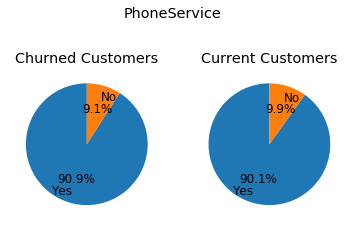

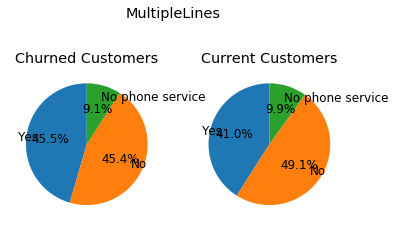

In [24]:
for col_name in phone_column_names:
    churned_count = df_churned[col_name].value_counts()
    stayed_count = df_current[col_name].value_counts()
    
    churned_values = []
    for i in range(len(churned_count.index)):
        churned_values.append(churned_count[i])
    churned_labels = list(churned_count.index)
    
    stayed_values = []
    for i in range(len(stayed_count.index)):
        stayed_values.append(stayed_count[i])
    stayed_labels = list(stayed_count.index)
    
    churned_values_ordered = []
    stayed_values_ordered = []
    ordered_labels = []

    for name in churned_labels:
        churned_idx = churned_labels.index(name)
        stayed_idx = stayed_labels.index(name)
        churned_values_ordered.append(churned_values[churned_idx])
        stayed_values_ordered.append(stayed_values[stayed_idx])
        ordered_labels.append(name)
    
    fig = plt.figure()

    ax1 = fig.add_subplot(121) 
    ax1.pie(churned_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
         startangle=90, labeldistance=0.8)
    ax1.set_title("Churned Customers")

    ax2 = fig.add_subplot(122) 
    ax2.pie(stayed_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
        shadow=False, startangle=90, labeldistance=0.8)
    ax2.set_title("Current Customers")
    
    plt.suptitle(col_name)
    plt.show()
    
    print('\n')


The phone service doesn't seem to affect the churn-rate significantly.

#### The Internet Services
Now let's take a look at the Internet service. For the comparison of the Internet services, customers without the Internet services will be excluded.

In [25]:
internet_column_names = ["InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

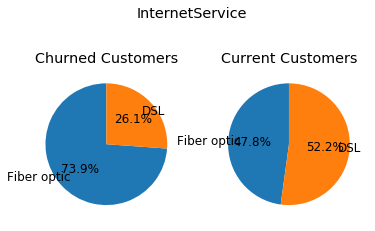

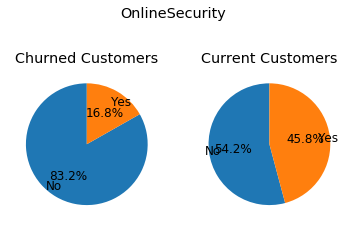

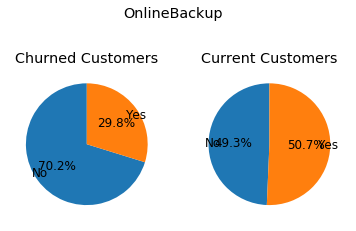

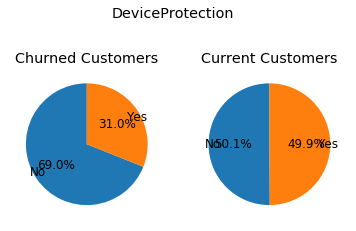

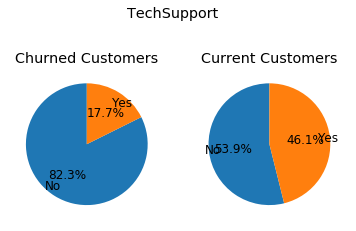

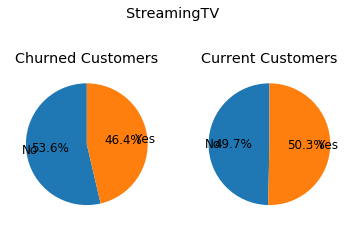

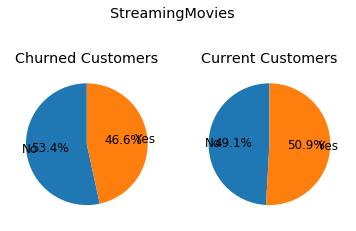

In [26]:
for col_name in internet_column_names:
    churned_count = df[(df["InternetService"] != "No") & (df["Churn"] == "Yes")][col_name].value_counts()
    stayed_count = df[(df["InternetService"] != "No") & (df["Churn"] == "No")][col_name].value_counts()
    
    churned_values = []
    for i in range(len(churned_count.index)):
        churned_values.append(churned_count[i])
    churned_labels = list(churned_count.index)
    
    stayed_values = []
    for i in range(len(stayed_count.index)):
        stayed_values.append(stayed_count[i])
    stayed_labels = list(stayed_count.index)
    
    churned_values_ordered = []
    stayed_values_ordered = []
    ordered_labels = []

    for name in churned_labels:
        churned_idx = churned_labels.index(name)
        stayed_idx = stayed_labels.index(name)
        churned_values_ordered.append(churned_values[churned_idx])
        stayed_values_ordered.append(stayed_values[stayed_idx])
        ordered_labels.append(name)
    
    fig = plt.figure()

    ax1 = fig.add_subplot(121) 
    ax1.pie(churned_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
         startangle=90, labeldistance=0.8)
    ax1.set_title("Churned Customers")

    ax2 = fig.add_subplot(122) 
    ax2.pie(stayed_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
        shadow=False, startangle=90, labeldistance=0.8)
    ax2.set_title("Current Customers")
    
    plt.suptitle(col_name)
    plt.show()
    
    print('\n')


Tech support, Online Security, Internet type, seem to have a significant influence on the churn-rate, and to a lesser degree, Online Backup and the Device Protection. Streaming TV and movies don't seem to influence heavily.

Having a tech support aliviates a lot of frustration when customers have problems, so it makes sense that having tech support helps customers to stay with the company. 

The difference between DSL vs fiber optics is interesting. DSL is affordable, but slower than fiber optics, while fiber optics is fast, but much more costly. I would guess that customers who chose fiber optics are quality-oriented customers (i.e. customers with sufficent discretionary income, who are interested in what they receive), and customers opting for DSL are price-sensitive, who do not need fast Internet connection.

Is it possible that some price-sensitive customers find the fiber optics Internet unaffordable, resulting in their departure from the company?

On the other hand, it looks like services such as online security and online backup are provide significant value to customers, and those customers who subscribed for these services are more likely to stay with the company.

The streaming TV and movies services have much less significance compared to other features. This could be because  customers can receive similar services from a third party providers (YouTube, Netflix, iTunes, etc.) so the added value of having these services is not noticible.

#### Tenure Length
Finally, let's take a look at the tenure length by the churned customers vs the current customers.

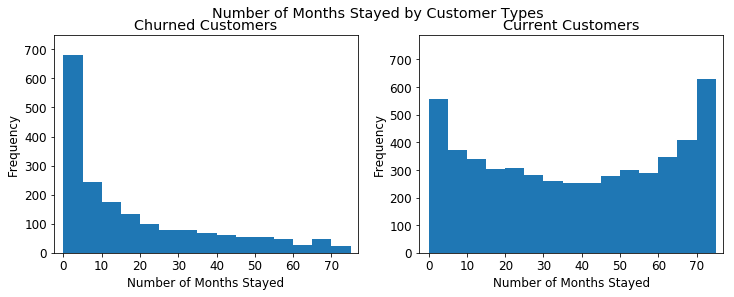

In [27]:
bin_size = 5 # A size of a bin 
bins = np.arange(0, df[df["Churn"] == "Yes"]["tenure"].max()+bin_size, bin_size) # Array of bins

# Get the maxima values to be used for graphs
largest = df[df["Churn"] == "No"]["tenure"].max() # Max value of the tenure column
bin_numbers = (math.ceil(largest/(bin_size * 10)) * 10) # Calculate the number of bins to be graphed. A bit hacky.
count_churned, division_churned = np.histogram(df[df["Churn"] == "Yes"]["tenure"], bin_numbers) # Get the histogram raw data for the churned customers
count_stayed, division_stayed = np.histogram(df[df["Churn"] == "No"]["tenure"], bin_numbers) # Get the histogram raw data for the current customers

max_count_churned = count_churned.max()
max_count_stayed = count_stayed.max()
max_division_churned = division_churned.max()
max_division_stayed = division_stayed.max()

max_count_val = max_count_churned if max_count_churned >= max_count_stayed else max_count_stayed
max_division_val = max_division_churned if max_division_churned >= max_division_stayed else max_division_stayed

ylim_churned = max_count_churned * 1.1 # Multiply by 1.1 to give the graph a slightly more head room
ylim_stayed = max_count_stayed * 1.1 # Multiply by 1.1 to give the graph a slightly more head room

max_count_val = round(max_count_val, -1) *  1.1 # Multiply by 1.1 to give the graph a slightly more head room
max_division_val = round(max_division_val) + bin_size

# Create graphs
plt.rcParams.update({'figure.figsize': [12, 4]})
plt.figure()

plt.suptitle("Number of Months Stayed by Customer Types")
plt.subplot(1, 2, 1)
plt.hist(data=df[df["Churn"] == "Yes"], x="tenure", bins=bins)
plt.title("Churned Customers")
plt.xlabel("Number of Months Stayed")
plt.ylabel("Frequency")
plt.xlim(-2.5, max_division_val)
plt.ylim(0, ylim_churned)

plt.subplot(1, 2, 2)
plt.hist(data=df[df["Churn"] == "No"], x="tenure", bins=bins)
plt.title("Current Customers")
plt.xlabel("Number of Months Stayed")
plt.ylabel("Frequency")
plt.xlim(-2.5, max_division_val)
plt.ylim(0, ylim_stayed);

Interestingly, churned customers are much more likely to churn within a year. 

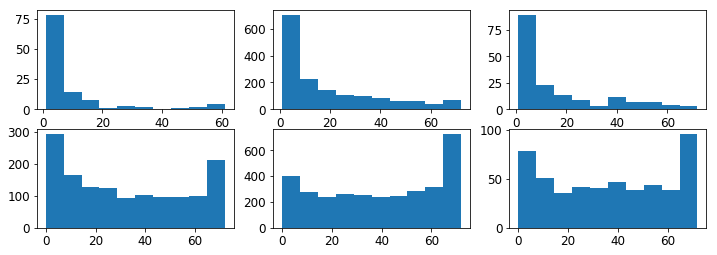

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(231)
ax1.hist(df[(df["InternetService"] == "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "Yes")]["tenure"])
ax2 = fig.add_subplot(232)
ax2.hist(df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "Yes")]["tenure"])
ax3 = fig.add_subplot(233)
ax3.hist(df[(df["InternetService"] != "No") & (df["PhoneService"] == "No") & (df["Churn"] == "Yes")]["tenure"])
ax4 = fig.add_subplot(234)
ax4.hist(df[(df["InternetService"] == "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "No")]["tenure"])
ax5 = fig.add_subplot(235)
ax5.hist(df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "No")]["tenure"])
ax6 = fig.add_subplot(236)
ax6.hist(df[(df["InternetService"] != "No") & (df["PhoneService"] == "No") & (df["Churn"] == "No")]["tenure"]);

### Revenue Based Analysis
Another insight the company might be interested is the origin of the revenue. A deeper understanding of the customer segments can lead to effective business strategies. So let's take a look at the "TotalCharges" column, and break it down by customer segments.

#### Who is the most valuable customer segment?
First, let's see how much revenue comes from each of the customers by services subscribed.

In [29]:
revenue_services = []
revenue_services_labels = []

# Phone service only customers
revenue_services.append(df[(df["InternetService"] == "No") & (df["PhoneService"] == "Yes")]["TotalCharges"].sum())
revenue_services_labels.append("Phone Only")

# Internet service only customers
revenue_services.append(df[(df["InternetService"] != "No") & (df["PhoneService"] == "No")]["TotalCharges"].sum())
revenue_services_labels.append("Internet Only")

# Phone  and Internet customers
revenue_services.append(df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes")]["TotalCharges"].sum())
revenue_services_labels.append("Phone and Internet")

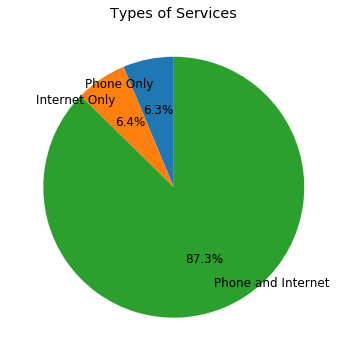

In [36]:
plt.rcParams.update({'figure.figsize': [10, 6]})
fig = plt.figure()

ax = fig.add_subplot(111)
ax.pie(revenue_services, labels=revenue_services_labels, startangle=90, autopct='%1.1f%%', labeldistance=0.8)
ax.set_title("Types of Services")
plt.show()

The significant majority of the revenue comes from customers who subscribe to both the phone and the Internet services.

In [39]:
df_stayed_has_internet

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [14]:
column_names_to_compare = list(df.columns)
col_to_remove = ["customerID", "tenure", "MonthlyCharges", "TotalCharges", "Churn"]
for name in col_to_remove:
    column_names_to_compare.remove(name)

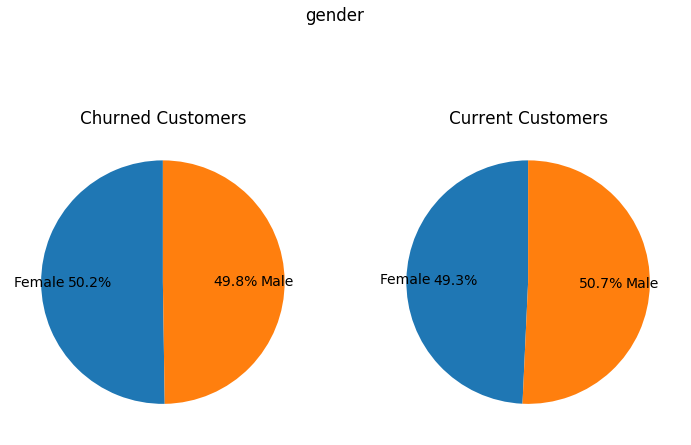

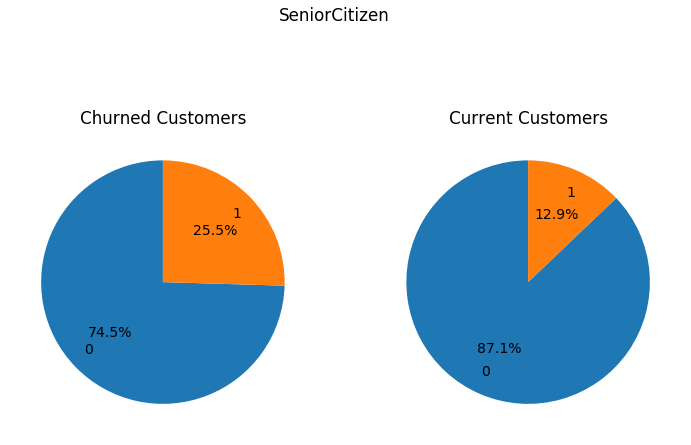

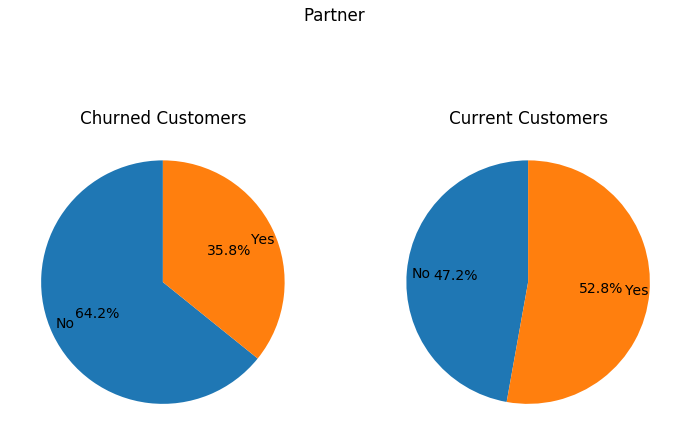

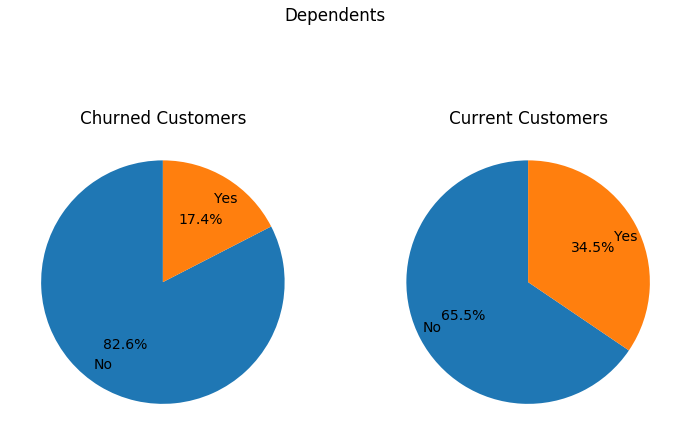

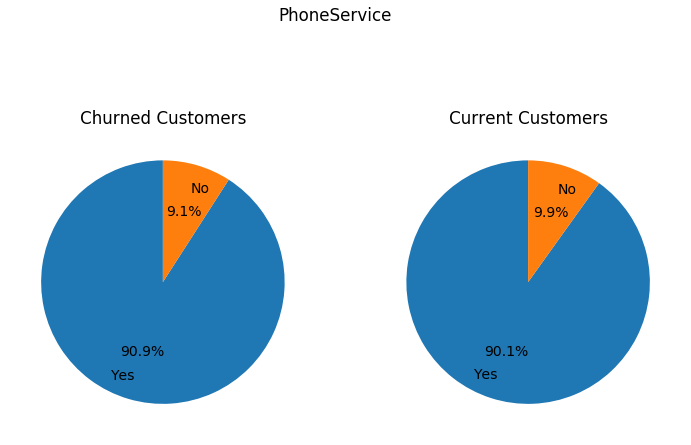

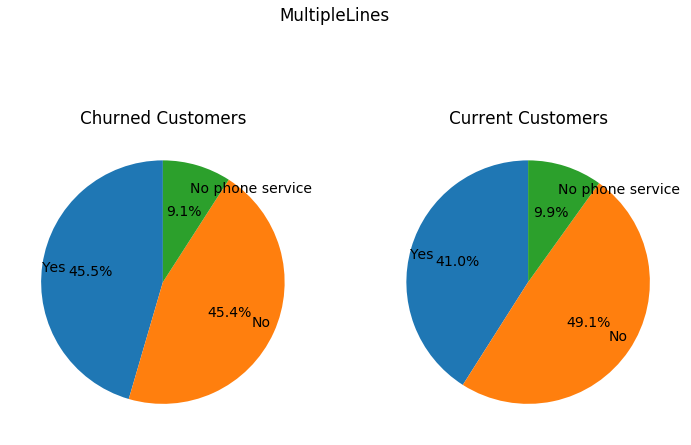

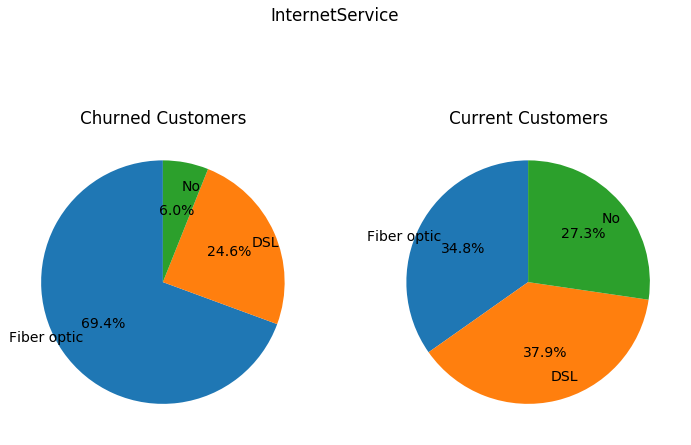

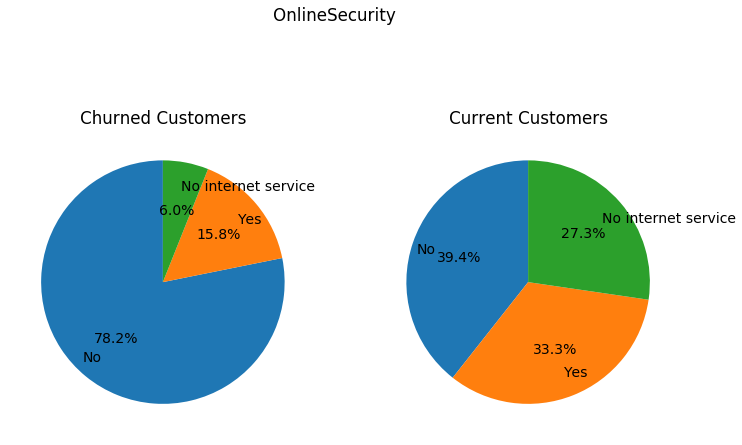

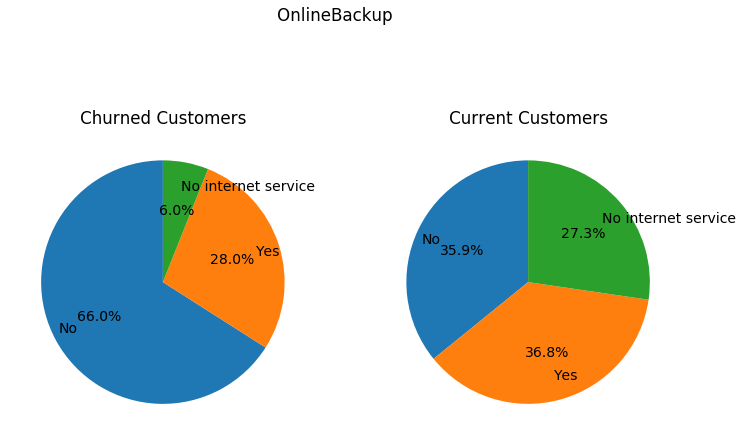

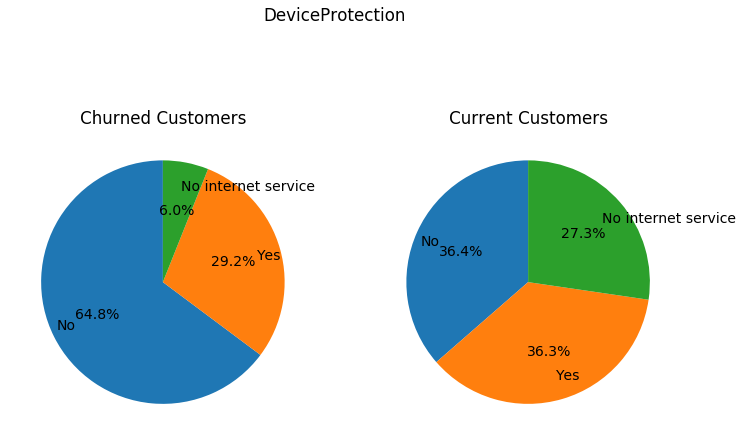

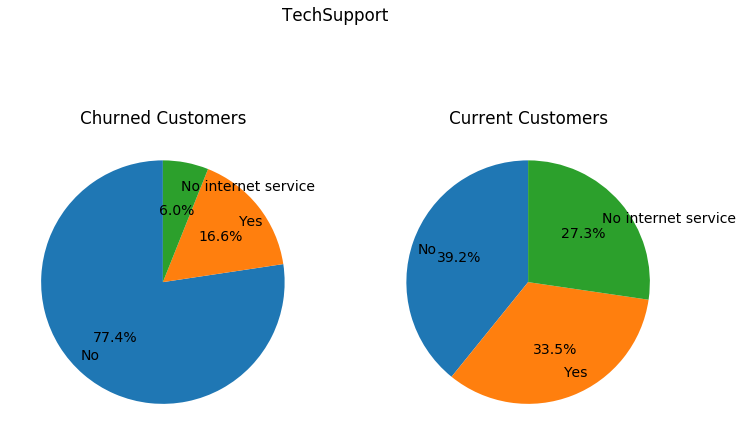

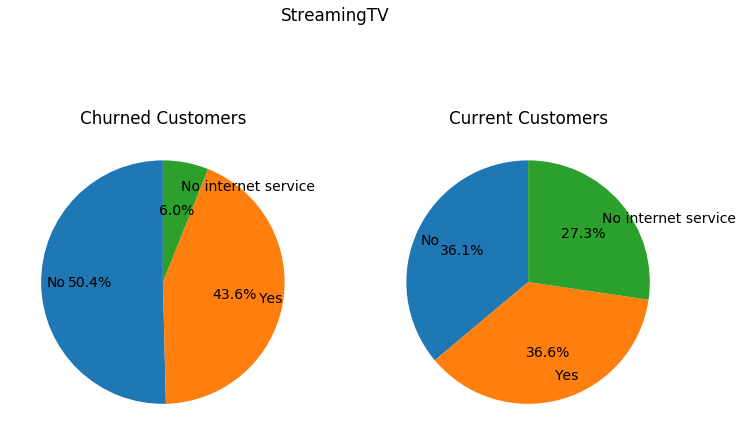

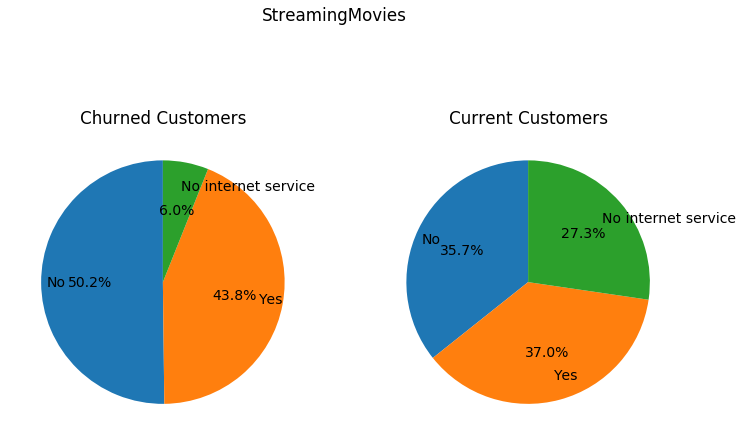

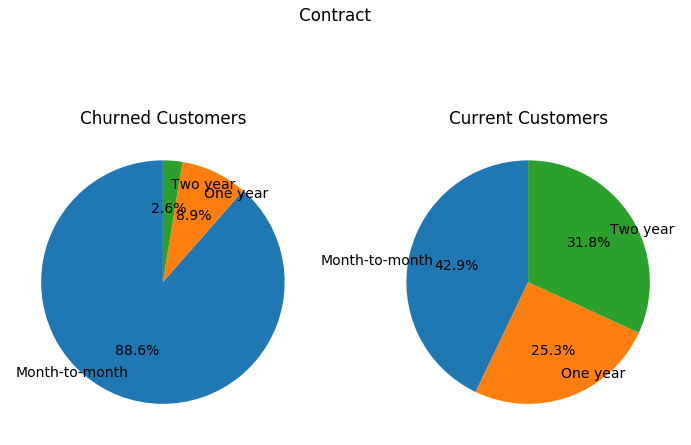

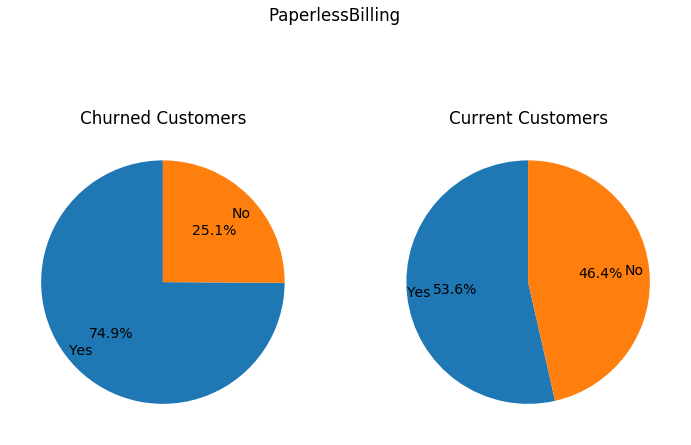

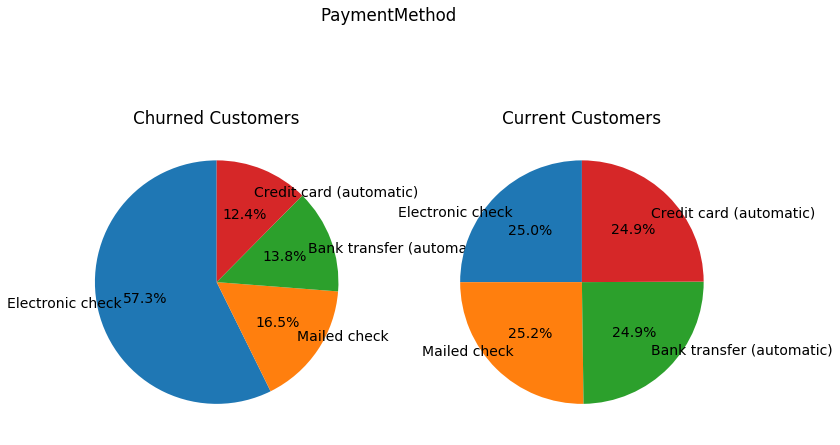

In [16]:
for col_name in column_names_to_compare:
    churned_count = df_churned[col_name].value_counts()
    stayed_count = df_stayed[col_name].value_counts()
    
    churned_values = []
    for i in range(len(churned_count.index)):
        churned_values.append(churned_count[i])
    churned_labels = list(churned_count.index)
    
    stayed_values = []
    for i in range(len(stayed_count.index)):
        stayed_values.append(stayed_count[i])
    stayed_labels = list(stayed_count.index)
    
    churned_values_ordered = []
    stayed_values_ordered = []
    ordered_labels = []

    for name in churned_labels:
        churned_idx = churned_labels.index(name)
        stayed_idx = stayed_labels.index(name)
        churned_values_ordered.append(churned_values[churned_idx])
        stayed_values_ordered.append(stayed_values[stayed_idx])
        ordered_labels.append(name)
    
    fig = plt.figure()

    ax1 = fig.add_subplot(121) 
    ax1.pie(churned_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
         startangle=90, labeldistance=0.8)
    ax1.set_title("Churned Customers")

    ax2 = fig.add_subplot(122) 
    ax2.pie(stayed_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
        shadow=False, startangle=90, labeldistance=0.8)
    ax2.set_title("Current Customers")
    
    plt.suptitle(col_name)
    plt.show()
    
    print('\n')


In [17]:
# Separating the churned and the current customers into a separate dataframes.
churned_tenure = df_churned["tenure"] 
stayed_tenure = df_stayed["tenure"]
print(churned_tenure.max())
print(stayed_tenure.max())
churned_MonthlyCharges = df_churned["MonthlyCharges"] 
stayed_MonthlyCharges = df_stayed["MonthlyCharges"]
print(churned_MonthlyCharges.max())
print(stayed_MonthlyCharges.max())

72
72
118.35
118.75


In [18]:
plt.rcParams.update({'figure.figsize': [12, 6]})

[105  45  29  26  30  93  81  70  30  21 163 184 178 178 136 176 163 113
  39   9]
[ 18.85   23.825  28.8    33.775  38.75   43.725  48.7    53.675  58.65
  63.625  68.6    73.575  78.55   83.525  88.5    93.475  98.45  103.425
 108.4   113.375 118.35 ]
202.4
1191.3000000000002


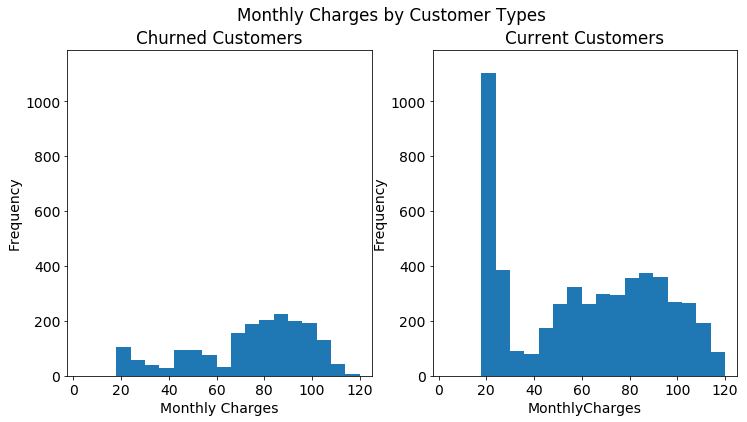

In [34]:
bin_size = 6 # A size of a bin 
bins = np.arange(0, stayed_MonthlyCharges.max()+bin_size, bin_size) # Array of bins

# Get the maxima values to be used for graphs
largest = df_stayed["MonthlyCharges"].max() # Max value of the tenure column
bin_numbers = (math.ceil(largest/(bin_size * 10)) * 10) # Calculate the number of bins to be graphed. A bit hacky.
count_churned, division_churned = np.histogram(df_churned["MonthlyCharges"], bin_numbers) # Get the histogram raw data for the churned customers
count_stayed, division_stayed = np.histogram(df_stayed["MonthlyCharges"], bin_numbers) # Get the histogram raw data for the current customers

print(count_churned)
print(division_churned)

max_count_churned = count_churned.max()
max_count_stayed = count_stayed.max()
max_division_churned = division_churned.max()
max_division_stayed = division_stayed.max()

max_count_val = max_count_churned if max_count_churned >= max_count_stayed else max_count_stayed
max_division_val = max_division_churned if max_division_churned >= max_division_stayed else max_division_stayed

ylim_churned = max_count_churned * 1.1 # Multiply by 1.1 to give the graph a slightly more head room
ylim_stayed = max_count_stayed * 1.1 # Multiply by 1.1 to give the graph a slightly more head room

max_count_val = round(max_count_val, -1) *  1.1 # Multiply by 1.1 to give the graph a slightly more head room
max_division_val = round(max_division_val) + bin_size

print(ylim_churned)
print(ylim_stayed)

# Create graphs
plt.figure()

plt.suptitle("Monthly Charges by Customer Types")
plt.subplot(1, 2, 1)
plt.hist(data=df_churned, x="MonthlyCharges", bins=bins)
plt.title("Churned Customers")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.xlim(-2.5, max_division_val)
plt.ylim(0, max_count_val)

plt.subplot(1, 2, 2)
plt.hist(data=df_stayed, x="MonthlyCharges", bins=bins)
plt.title("Current Customers")
plt.xlabel("MonthlyCharges")
plt.ylabel("Frequency")
plt.xlim(-2.5, max_division_val)
plt.ylim(0, max_count_val);

In [28]:
df_best_customers = df.loc[df["tenure"] > 36].copy()
df_best_customers.shape

(3001, 21)

In [33]:
df_best_customers["TotalCharges"].sum()/df["TotalCharges"].sum()*100

78.75716515111105

Approximately 80% of the revenue comes from the customers who stays longer than 36 months. 

ValueError: 'label' must be of length 'x'

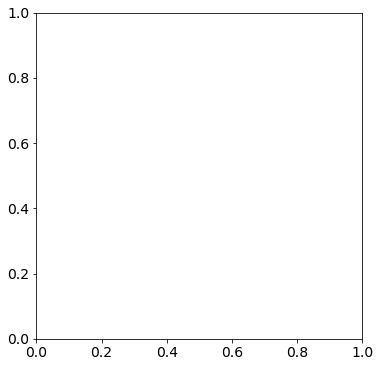

In [43]:
# To be continued from here. 
for col_name in column_names_to_compare:
    best_counts = df_stayed[col_name].value_counts()
    
    best_values = []
    best_labels = best_counts.index[0]
    
    # Add values to best_values here
    
    fig = plt.figure()

    ax1 = fig.add_subplot(111) 
    ax1.pie(best_count, labels=best_labels, autopct='%1.1f%%',
         startangle=90, labeldistance=0.8)
    ax1.set_title("Best Customers")
    
    plt.suptitle(col_name)
    plt.show()
    
    print('\n')

In [38]:
best_count = df_best_customers["OnlineBackup"].value_counts()

In [42]:
best_count["Yes"]

1555

In [16]:
total = count_churned + count_stayed
ratio = count_churned / total * 100

In [31]:
x = list(division_churned)
x.remove(72.0)

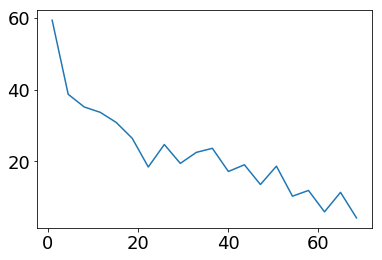

In [32]:
plt.plot(x, ratio);